***Mínimos cuadrados***
     * Polyfit, ajustamos los datos a un polinomio, usa Nedler-Mead algorithm 
     * Curve fit, en este caso le damos nosotros que modelo es y escogemos algoritmo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

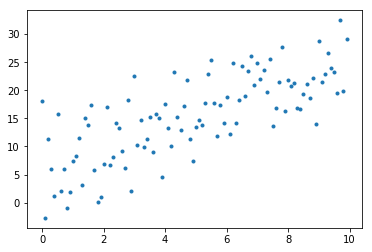

In [2]:
# generamos set de datos con ruido gaussiano de dispersion sigma=5
def func(x):
    return 2*x+5 
x=np.arange(0,10,0.1)
noise=5*np.random.randn(len(x))
y=func(x)+noise
plt.plot(x,y,'.')


 
1.927 x + 5.929


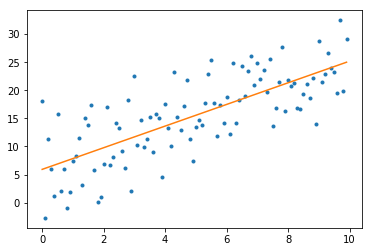

In [3]:
a=np.polyfit(x,y,1) # como es una recta polynomio de grado 1, ax+b, a=a[0],b=a[1]
linearFit=np.poly1d(a) # es como escribir la funcion def linearFit(x):  return ax+b 
y1=linearFit(x)
plt.plot(x,y,'.')
plt.plot(x,y1)
print linearFit


Probamos con grado 2:


          2
-0.04734 x + 2.395 x + 5.164


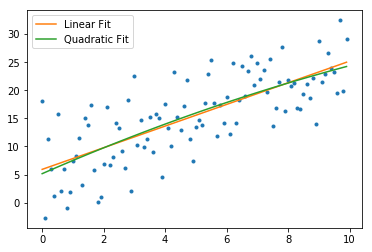

In [4]:
a=np.polyfit(x,y,2)
QuadraticFit=np.poly1d(a)
print QuadraticFit
y2=QuadraticFit(x)
plt.plot(x,y,'.')
plt.plot(x,y1,label='Linear Fit')
plt.plot(x,y2,label='Quadratic Fit')
plt.legend()

Vemos valor de la suma de residuos

In [5]:
print 'minimos cuadrados recta',sum((y-y1)**2)
print 'minimos cuadrados parábola',sum((y-y2)**2)

minimos cuadrados recta 2514.529033968755
minimos cuadrados parábola 2502.083883124071


Aunque la suma de residuos es menor, los valores de los parámetros son mucho más parecidos al input en el caso de la recta. Hay que vigilar con el overfitting (sobreajuste)--> Cuanto mayor es el grado del polinomio más se ajustará a estos datos, pero peor será el modelo predictivo.

Una manera de saber si un modelo es mejor con otro es testarlo en otro rango diferente, en este caso el cuadrático fallaría



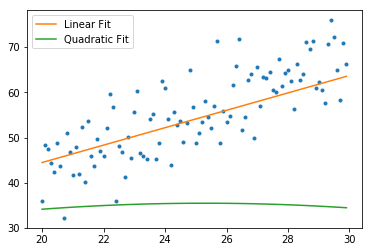

In [6]:
xnew=np.arange(20,30,0.1)
noise=5*np.random.randn(len(xnew))
ynew=func(xnew)+noise
plt.plot(xnew,ynew,'.')
# no vuelvo a hacer los ajustes, uso los valores anteriores
plt.plot(xnew,linearFit(xnew),label='Linear Fit') 
plt.plot(xnew,QuadraticFit(xnew),label='Quadratic Fit')
plt.legend()

Si nuestro modelo no es un polinomio usaremos curve_fit

In [7]:
#Probamos ahora con curve_fit
help(opt.curve_fit)


Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array for functions with k predictors
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence, optional
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be det

In [7]:
# tenemos una función sinusoidal ue depende de a,b,c 
def func(x, a, b, c):
     return a * np.sin(b*x+c)

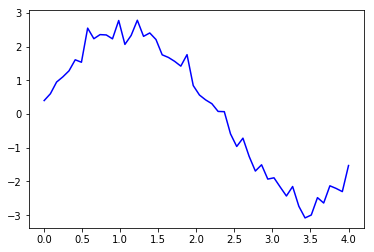

In [41]:
# Generamos set de datos (!!! en la realidad no los simularíamos nosotros!!!)
x = np.linspace(0, 4, 50)
true_val=[2.5,1.3,0.2]
y = func(x, *true_val)
y_noise = 0.2 * np.random.randn(x.size)
y = y + y_noise
plt.plot(x, y, 'b-', label='data')


In [42]:
popt, pcov = opt.curve_fit(func, x, y)
print popt
print true_val

[2.52099282 1.30804077 0.15768434]
[2.5, 1.3, 0.2]


In [43]:
pcov  # errores en los parámetros

array([[ 0.00223773,  0.00016051, -0.00038878],
       [ 0.00016051,  0.00037363, -0.00067476],
       [-0.00038878, -0.00067476,  0.00164654]])

Text(0,0.5,'y')

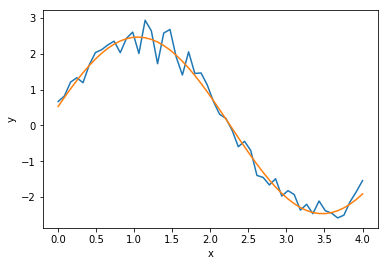

In [29]:
plt.plot(x,y,label='data')
plt.plot(x,func(x,*popt),label='fit')
plt.xlabel('x')
plt.ylabel('y')